# Twister Tongue Corpus Analysis<br>
## Natalia Wojarnik

In [138]:
#Useful libraries and modules

import nltk, re, pprint, string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer

#Reading a raw text without cleaning

my_corpus = open("Tongue_Twister_Corpus.txt")
text = my_corpus.read()

<p>The text is loaded and it's a string as a Python object. Printing the first 100 entries would give the first 100 characters (letters, whitespaces, punctuation etc.).</p>

In [139]:
text = text.split()
print(text[:20])

['I', 'scream,', 'you', 'scream,', 'We', 'all', 'scream', 'for', 'ice', 'cream.', 'Betty', 'Botter', 'bought', 'some', 'butter', 'but,', 'said', 'she,', 'the', "butter's"]


## Cleaning the data

<p>Now it's a list of strings but still not words. There are a lot of symbols and punctuation.<br><br>
Removing the punctuation using regex in a function.<br>
Standarization, tokenization, lowering case, number of tokens/types and richness of vocabulary.<br></p>

In [140]:
def remove_punc(x):
    x_words = []
    for w in x:
        word = re.sub(r'[^\w\s\-\']','',w) #this removes everything except words, spaces, hyphens and apostrophes
        x_words.append(word)
    return x_words

In [141]:
text = remove_punc(text)
print(text[:20])

['I', 'scream', 'you', 'scream', 'We', 'all', 'scream', 'for', 'ice', 'cream', 'Betty', 'Botter', 'bought', 'some', 'butter', 'but', 'said', 'she', 'the', "butter's"]


In [142]:
tokens = [w.lower() for w in text]
print(tokens[:20])
print(f"There are {len(tokens)} tokens in the corpus.")

['i', 'scream', 'you', 'scream', 'we', 'all', 'scream', 'for', 'ice', 'cream', 'betty', 'botter', 'bought', 'some', 'butter', 'but', 'said', 'she', 'the', "butter's"]
There are 1523 tokens in the corpus.


<p>There are 1523 tokens in the corpus.</p>

In [143]:
types = sorted(set(tokens))
print(types[:20])
print(f"There are {len(types)} types in the corpus.")

['', "'t", 'a', 'across', 'again', 'against', 'all', 'also', 'although', 'amidst', 'an', 'and', 'any', 'are', 'arkansas', 'as', 'at', 'back', 'bad', 'badly']
There are 580 types in the corpus.


<p>There are 580 types in the corpus.</p>

In [144]:
types_perc = round(100*len(types)/len(tokens))
print(f"Percentage of unique words in the text is: {types_perc}%")

Percentage of unique words in the text is: 38%


## Frequency distribution

<p>Checking the frequency distribution over the types in the corpus.</p>

10 most common words are: [('a', 72), ('the', 67), ('i', 32), ('of', 25), ('and', 23), ('to', 19), ('you', 18), ('thought', 18), ('she', 17), ('can', 17)]

Token that has the most types is: ('a', 72)


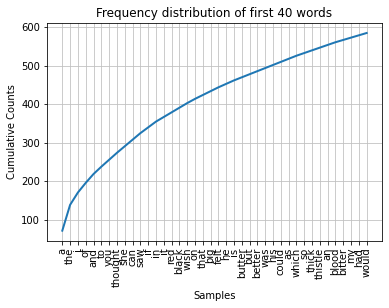

<AxesSubplot:title={'center':'Frequency distribution of first 40 words'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [145]:
freq_d = nltk.FreqDist(tokens)
x = 10
most_com = freq_d.most_common(x)
print(f"{x} most common words are: {most_com}\n")
print(f"Token that has the most types is: {most_com[0]}")
y = 40
freq_d.plot(y, cumulative = True, title = f"Frequency distribution of first {y} words")

## Frequency conclusion - Zipf's Law

<p>Analyzing the frequency of most common words in the corpus, I conclude that the frequency will follow Zipf's Law. Hence, very high-frequency words account for a small piece of corpus vocabulary.<br><br>
To prove it, I will look at hapaxes in the text.<br></p>

In [146]:
hapaxes = freq_d.hapaxes()
print(f"There are {len(hapaxes)} hapaxes in the corpus:\n")
hapaxes.sort()
print(hapaxes)
print(f"\nHapaxes determine {round(100*len(hapaxes)/len(types))}% of types in the corpus.")

There are 331 hapaxes in the corpus:

["'t", 'again', 'against', 'also', 'although', 'any', 'baked', 'balancing', "bally's", 'batches', 'been', "bike's", 'birthday', 'blades', 'bled', 'block', "bloke's", 'bludgeons', 'blueberry', 'blunderbusses', 'boasts', 'brake', 'brandished', 'brave', 'brewery', 'brigadiers', 'bright', 'brisk', 'broad', 'broke', 'brown', "butter's", 'carefully', 'cause', 'cheap', 'chef', 'chews', 'chic', 'chicken', 'choose', 'clam', 'clean', 'cling', 'coarse', 'coldest', 'comes', 'course', 'cows', 'cram', "dad's", 'date', 'dead', 'dick', 'did', "dodd's", 'does', "dog's", 'drew', 'eagerly', 'easter', 'eat', 'eddie', 'eerie', 'eggs', 'eight', 'elegant', 'eraser', 'eve', 'exists', 'famed', 'fields', 'figs', 'finch', 'fish', 'fists', 'flippant', 'fly', 'folly', 'fought', 'framing', 'free', 'fresh', 'friends', 'frogs', 'frolicked', 'frosts', 'furious', 'furlongs', 'gate', 'ghosts', "golli's", 'golliwog', 'got', 'grape', 'grapes', 'grow', 'growers', 'hair', 'happen', 'has

## Lemmatization and Stemming

<p>To be more accurate with counting the vocabulary distribution over the text, I will conduct basic lemmatization process using Python Lemmatizer.<br><br>
The process will be done using the list of tokens ("tokens" object) after doing standarization and tokenization.<br></p>

In [147]:
lemmatizer = WordNetLemmatizer()
lemm_tokens = ' '.join([lemmatizer.lemmatize(w) for w in tokens])
lemm_tokens = lemm_tokens.split()
print(lemm_tokens[:20])

['i', 'scream', 'you', 'scream', 'we', 'all', 'scream', 'for', 'ice', 'cream', 'betty', 'botter', 'bought', 'some', 'butter', 'but', 'said', 'she', 'the', "butter's"]


In [148]:
stemmer = PorterStemmer()
def stemming(x):
    list_tokens = []
    for w in x:
        root = stemmer.stem(w)
        list_tokens.append(root)
    return list_tokens

stem_tokens = stemming(lemm_tokens)
print(stem_tokens[:20])
print(f"\nThere are {len(stem_tokens)} tokens in the corpus (using Lemmatizer and Stemmer).")

['i', 'scream', 'you', 'scream', 'we', 'all', 'scream', 'for', 'ice', 'cream', 'betti', 'botter', 'bought', 'some', 'butter', 'but', 'said', 'she', 'the', "butter'"]

There are 1520 tokens in the corpus (using Lemmatizer and Stemmer).


In [149]:
stem_types = sorted(set(stem_tokens))
print(stem_types[:20])
print(f"\nThere are {len(stem_types)} types in the corpus (using Lemmatizer and Stemmer).")

["'t", 'a', 'across', 'again', 'against', 'all', 'also', 'although', 'amidst', 'an', 'and', 'ani', 'are', 'arkansa', 'at', 'back', 'bad', 'badli', 'bake', 'balanc']

There are 543 types in the corpus (using Lemmatizer and Stemmer).


In [150]:
stem_types_perc = round(100*len(stem_types)/len(stem_tokens))
print(f"Percentage of unique words in the text (using Lemmatizer and Stemmer) is: {stem_types_perc}%")

Percentage of unique words in the text (using Lemmatizer and Stemmer) is: 36%


## Frequency distribution using Lemmatizer and Stemmer

In [151]:
stem_freq_d = nltk.FreqDist(stem_tokens)
x = 10
stem_most_com = stem_freq_d.most_common(x)
print(f"{x} most common words are: {stem_most_com}\n")

10 most common words are: [('a', 80), ('the', 67), ('i', 32), ('of', 25), ('and', 23), ('thought', 19), ('can', 19), ('to', 19), ('you', 18), ('she', 17)]



In [152]:
print(stem_most_com == most_com)
print(stem_most_com)
print(most_com)
print(f"\nThe most {x} frequent words in the corpus didn't change after using Lemmatizer and Stemmer. But what is interesting, their counts changed.")
print(f"Token that has the most types is: {stem_most_com[0]}\nToken is the same comparing to manual lemmatization but the count is different.")

False
[('a', 80), ('the', 67), ('i', 32), ('of', 25), ('and', 23), ('thought', 19), ('can', 19), ('to', 19), ('you', 18), ('she', 17)]
[('a', 72), ('the', 67), ('i', 32), ('of', 25), ('and', 23), ('to', 19), ('you', 18), ('thought', 18), ('she', 17), ('can', 17)]

The most 10 frequent words in the corpus didn't change after using Lemmatizer and Stemmer. But what is interesting, their counts changed.
Token that has the most types is: ('a', 80)
Token is the same comparing to manual lemmatization but the count is different.


<p>The last thing to compare will be hapaxes.</p>

In [153]:
stem_hapaxes = stem_freq_d.hapaxes()
print(f"There are {len(stem_hapaxes)} hapaxes in the corpus (using Lemmatizer and Stemmer):\n")
stem_hapaxes.sort()
print(stem_hapaxes)
print(f"\nHapaxes determine {round(100*len(stem_hapaxes)/len(stem_types))}% of types in the corpus (using Lemmatizer and Stemmer).")

There are 293 hapaxes in the corpus (using Lemmatizer and Stemmer):

["'t", 'again', 'against', 'also', 'although', 'ani', 'bake', 'balanc', "bally'", 'batch', 'been', "bike'", 'birthday', 'blade', 'bled', 'block', "bloke'", 'bludgeon', 'blueberri', 'blunderbuss', 'boast', 'brake', 'brandish', 'brave', 'breweri', 'brigadi', 'bright', 'brisk', 'broad', 'broke', 'brown', "butter'", 'care', 'caus', 'cheap', 'chef', 'chew', 'chic', 'chicken', 'choos', 'clam', 'clean', 'cling', 'coars', 'coldest', 'come', 'cours', 'cram', "dad'", 'date', 'dead', 'dick', 'did', "dodd'", 'doe', "dog'", 'drew', 'eagerli', 'easter', 'eddi', 'eeri', 'egg', 'eight', 'eleg', 'eras', 'eve', 'exist', 'fame', 'field', 'finch', 'fish', 'fist', 'fli', 'flippant', 'folli', 'fought', 'frame', 'free', 'fresh', 'friend', 'frog', 'frolick', 'frost', 'furiou', 'furlong', 'gate', 'ghost', 'golliwog', 'got', 'grow', 'grower', 'ha', 'hair', 'happen', "hat'", 'hick', 'hole', 'hurri', 'ice', 'iguana', 'imagin', 'impossibly-imprac

## Conclusions

<p>There is a slight difference in counts and numbers between the data processed manually using regular expressions and using NLTK tools, Lemmatizer and Stemmer. The reason is the ambiguity of language and the difficulty in setting clear boundaries between linguistic properties.<br>
Therefore, linguistic research requires describing and clarifying the analysis levels like operational definitions trying to minimize the linguistic ambiguity and constitute the structure for analysis.</p>